In [1]:
import sys
sys.path.append('./')
from os import path
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from util.table_converter import TableConverter, TableProps;
from generator.constant import Constant
from statistics import mean, median, variance, stdev

In [2]:
target_project_names = list(map(lambda s : s.split('/')[-1].split('.')[0], glob('../compile_information/*.json')))
target_project_names.remove('template')
target_project_names.remove('compile_information')

target_project_root_paths = [Constant.local_project_root_path + '/' + tpn for tpn in target_project_names]

project_root_path = Constant.output_root_path + '/' + 'project.csv'
project_df = pd.read_csv(project_root_path)

file_root_path = Constant.output_root_path + '/' + 'file.csv'
file_df = pd.read_csv(file_root_path)

available_macro_root_path = Constant.output_root_path + '/' + 'available_macros.csv'
available_macro_df = pd.read_csv(available_macro_root_path)

used_macro_root_path = Constant.output_root_path + '/' + 'used_macros.csv'
used_macro_df = pd.read_csv(used_macro_root_path)

defined_macro_root_path = Constant.output_root_path + '/' + 'defined_macros.csv'
defined_macro_df = pd.read_csv(defined_macro_root_path)

whole_macro_root_path = Constant.output_root_path + '/' + 'whole_macros.csv'
whole_macro_df = pd.read_csv(whole_macro_root_path)

macros_root_path =Constant.output_root_path + '/' + 'macros.csv'
macros_df = pd.read_csv(macros_root_path)

tvc = TableConverter()


## Loc of each files

In [3]:
from os import path
import pandas as pd
from glob import glob
from util.table_converter import TableConverter, TableProps;
from generator.constant import Constant

target_project_names = list(map(lambda s : s.split('/')[-1].split('.')[0], glob('../compile_information/*.json')))

local_project_root_path = Constant.local_project_root_path

c_file_loc_df = pd.DataFrame(columns=['project_name', 'sum', 'file_num', 'average'])

for target_project_name in target_project_names:
    target_project_root = local_project_root_path + '/' + target_project_name
    if not path.exists(target_project_root):
        continue
    c_files = glob('{}/**/*.c'.format(target_project_root), recursive=True)

    s = 0
    for file_path in c_files:
        with open (file_path, mode='r') as f:
            s += len(f.readlines())
    a = s / len(c_files)
    fn = len(c_files)
    c_file_loc_df = pd.concat([c_file_loc_df, pd.DataFrame([[target_project_name, s, fn, a]], columns=c_file_loc_df.columns)], ignore_index=True)



tvc = TableConverter()
tvc.save_as_table(TableProps(title="C file loc", file_name="c_file_loc", data=c_file_loc_df))




In [4]:
def show_with_boxplot(macro_df, title, x_label, y_label, normalize=False):
    macro_per_files_count = macro_df.groupby(['file_id']).count().sort_values(['macro_id'], ascending=False)

    file_macro_df = pd.merge(macro_df, file_df, on='file_id', how='left')
    file_macro_cnt_df = pd.merge(macro_per_files_count, file_df, on='file_id', how='left')
    del file_macro_cnt_df['name']
    del file_macro_cnt_df['path']
    del file_macro_cnt_df['id']
    del file_macro_df['name']
    del file_macro_df['path']
    del file_macro_df['id']

    data = dict()
    target_p_names = project_df[['project_id', 'name']]
    cnts = []
        
    for _, dt in target_p_names.iterrows():
        if not dt['name'] in target_project_names:
            continue
        filterd_cnt_id = file_macro_cnt_df[file_macro_cnt_df['project_id'] == dt['project_id']]
        filterd_id = file_macro_df[file_macro_df['project_id'] == dt['project_id']]
        cnts.append(len(filterd_cnt_id))
        if normalize:
            filterd_macro_cnt = len(pd.unique(filterd_id['macro_id']))
            data[dt['name']] = filterd_cnt_id['macro_id'].div(filterd_macro_cnt)
        else:
            data[dt['name']] = filterd_cnt_id['macro_id']
    project_file_available_macro_df = pd.DataFrame(data, columns=project_df['name'].unique())
    bxplt = project_file_available_macro_df.boxplot(return_type='axes')
    bxplt.set_title(title)
    bxplt.set_ylabel(y_label)
    bxplt.set_xlabel(x_label)
    if normalize:
        bxplt.set_yscale('log')

## Number of Used Macro in each File

In [5]:
import pandas as pd
from util.table_converter import TableConverter, TableProps;
from generator.constant import Constant

used_macro_root_path = Constant.output_root_path + '/' + 'used_macros.csv'
files_root_path = Constant.output_root_path + '/' + 'file.csv'

used_macros_df = pd.read_csv(used_macro_root_path)
files_df = pd.read_csv(files_root_path)


used_macro_per_files_count = used_macros_df.groupby(['file_id']).count().sort_values(['macro_id'], ascending=False)[:20]

file_used_macro_df = pd.merge(used_macro_per_files_count, files_df, on='file_id', how='left')


tvc = TableConverter()
tvc.save_as_table(TableProps(title="used_macro_count per files", file_name="used_macro_cnt", data=file_used_macro_df))




##  available macros in each files


In [6]:
import pandas as pd
from util.table_converter import TableConverter, TableProps;
from generator.constant import Constant

available_macro_root_path = Constant.output_root_path + '/' + 'available_macros.csv'
files_root_path = Constant.output_root_path + '/' + 'file.csv'

available_macros_df = pd.read_csv(available_macro_root_path)
files_df = pd.read_csv(files_root_path)


available_macro_per_files_count = available_macros_df.groupby(['file_id']).count().sort_values(['macro_id'], ascending=False)[:20]

file_available_macro_df = pd.merge(available_macro_per_files_count, files_df, on='file_id', how='left')


tvc = TableConverter()
tvc.save_as_table(TableProps(title="available_macro_count per files", file_name="available_macro_cnt", data=file_available_macro_df))




## Whole macros in Each files(Wtih boxplot)

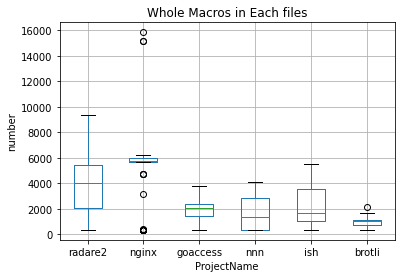

In [7]:
show_with_boxplot(whole_macro_df, "Whole Macros in Each files", "ProjectName", "number")

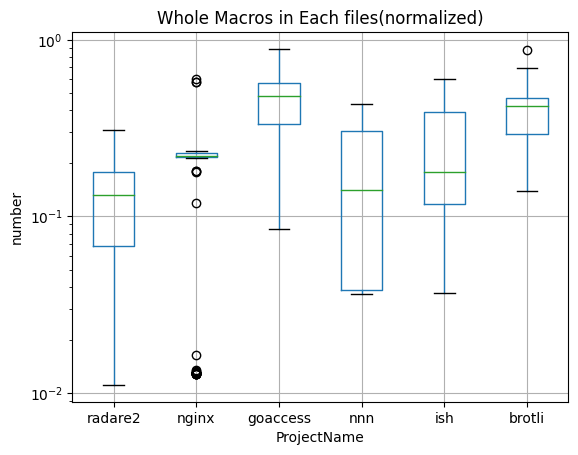

In [8]:
show_with_boxplot(whole_macro_df, "Whole Macros in Each files(normalized)", "ProjectName", "number", normalize=True)

## used macros in Each files(with boxplot)

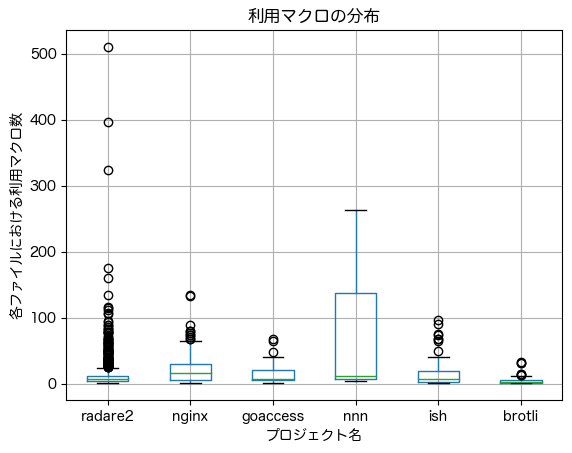

In [17]:
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
show_with_boxplot(used_macro_df, "利用マクロの分布", "プロジェクト名", "各ファイルにおける利用マクロ数")

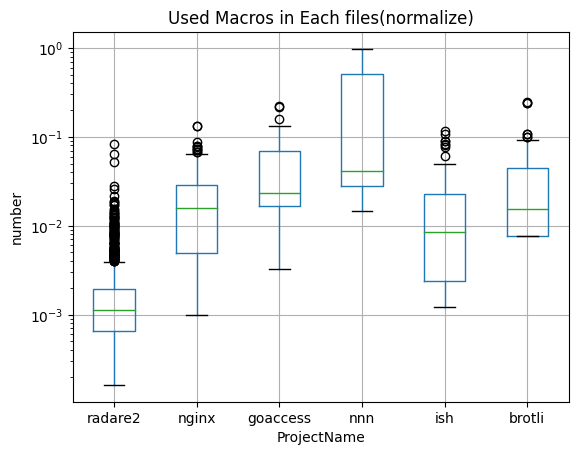

In [10]:
show_with_boxplot(used_macro_df, "Used Macros in Each files(normalize)", "ProjectName", "number", normalize=True)

## available macros in each files(with boxplot)


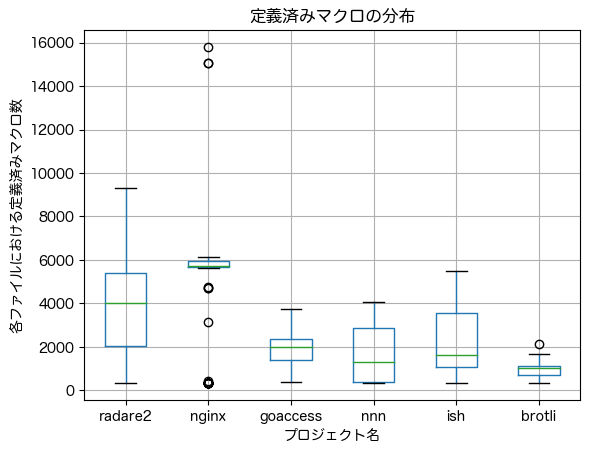

In [19]:
show_with_boxplot(available_macro_df, "定義済みマクロの分布", "プロジェクト名", "各ファイルにおける定義済みマクロ数")

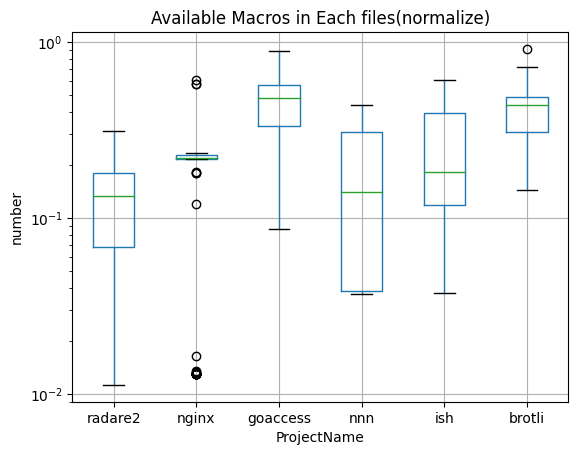

In [12]:
show_with_boxplot(available_macro_df, "Available Macros in Each files(normalize)", "ProjectName", "number", normalize=True)

## define macros in each files(with boxplot)


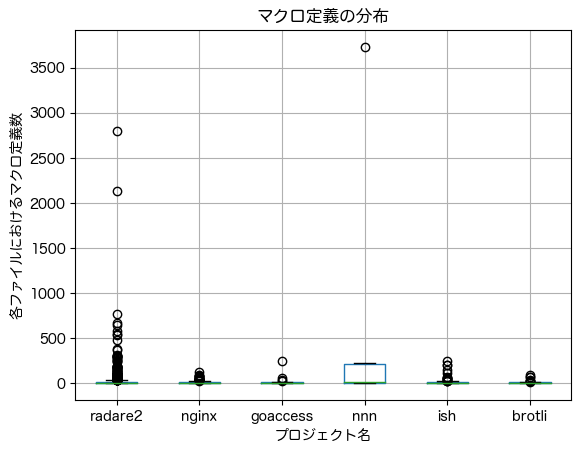

In [18]:
show_with_boxplot(defined_macro_df, "マクロ定義の分布", "プロジェクト名", "各ファイルにおけるマクロ定義数")

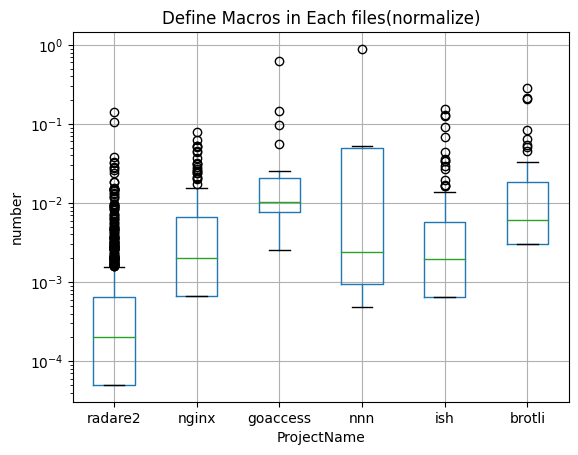

In [14]:
show_with_boxplot(defined_macro_df, "Define Macros in Each files(normalize)", "ProjectName", "number", normalize=True)

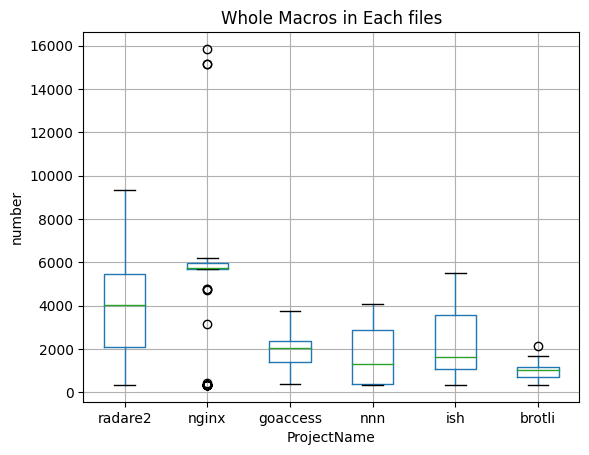

In [15]:
show_with_boxplot(whole_macro_df, "Whole Macros in Each files", "ProjectName", "number")

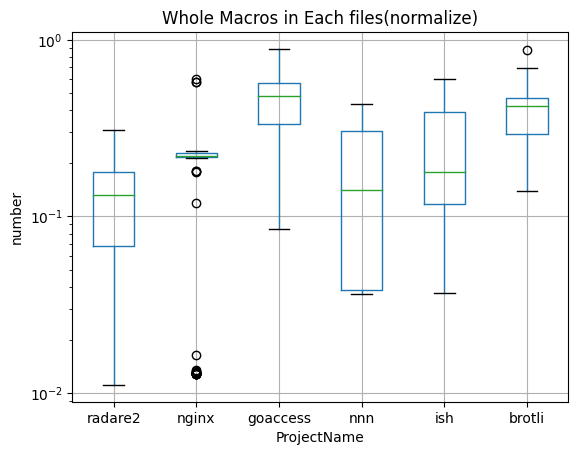

In [16]:
show_with_boxplot(whole_macro_df, "Whole Macros in Each files(normalize)", "ProjectName", "number", normalize=True)